# Loading dataset

In [1]:
%plot inline

In [2]:
!cat ../data/winequality.names

Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 016

In [3]:
!head ../data/winequality-red.csv

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5
11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5
7.9;0.6;0.06;1.6;0.069;15;59;0.9964;3.3;0.46;9.4;5
7.3;0.65;0;1.2;0.065;15;21;0.9946;3.39;0.47;10;7
7.8;0.58;0.02;2;0.073;9;18;0.9968;3.36;0.57;9.5;7


In [4]:
data = dlmread("../data/winequality-red.csv", ";" ,1, 0); % skip feature names
size(data)

ans =

   1599     12



# Separating into training and testing set

In [5]:
X = data(:,1:11); % inputs
y = data(:, 12);  % labels

In [6]:
X_train = X(1:1119, :); % 70% for trainig
y_train = y(1:1119);

X_test = X(1120:1599, :);  % 30% for test
y_test = y(1120:1599);

# ANN Architecture

![Diagram](../Diagram.png)

In [7]:
% M number of labeled inputs
% N number of features (lenght of input vector)
[M, N] = size(X_train)

M =  1119
N =  11


In [8]:
O = 8 % number of neurons in the hidden layer

O =  8


In [9]:
% initial weights matrix as small random values
W = rand([O N]).*0.01; % W: OxN

In [10]:
% adding column for bias
X_train_bias = [ones(size(X_train,1),1), X_train]'; % X_tr_b: MxN+1
W_bias = [ones(size(W,1),1), W];

## ANN function:

Feedfoward output:


$ \mathbf{u} = \mathbf{Wx} $  
$ \mathbf{a} = f(\mathbf{u}) = \tanh(\mathbf{u})$  
$ y = \sum \mathbf{a}$

$$
    y = \sum \tanh{(\mathbf{Wx})}
$$

## Backpropagation


Gradient descent for minimizing error function J:

$$
\mathbf{W^{N+1}} = \mathbf{W^N} - \alpha \nabla{J} =  \mathbf{W^N} - \alpha \frac{\partial{J}}{\partial{\mathbf{W}}}
$$

Definig error function as squared error:

$$
J = e^2 = (s-y)^2
$$

Chain rule for finding gradient of J:

$$
\frac{\partial{J}}{\partial{\mathbf{W}}} = \frac{\partial{J}}{\partial{e}} \frac{\partial{e}}{\partial{y}} \frac{\partial{y}}{\partial{\mathbf{a}}} \frac{\partial{\mathbf{a}}}{\partial{\mathbf{u}}} \frac{\partial{\mathbf{u}}}{\partial{\mathbf{W}}} = 2 (s - y) (-1) (1) \mathbf{\dot{F}(u)} \mathbf{x} = \boldsymbol{\delta} \mathbf {x}
$$

Where the array $\mathbf{\dot{F}(u)}$ is defined as:

$$
\mathbf{\dot{F}(u)} = 
\begin{bmatrix}
  \dot{f}(u_1) & 0 & \cdots  & 0 \\
  0 & \dot{f}(u_2) & \cdots  & 0 \\
  \vdots   & \vdots & \ddots & \vdots \\
  0 & 0 & \cdots  & \dot{f}(u_O) \\
\end{bmatrix}
$$

and:

$\dot{f}(u) = \frac{d \tanh(u)}{du} = sech^2(u)$

Error metric:

$$
MSE = \frac{1}{M}\sum_M e^2 = \frac{1}{M}\sum_M (s - y)^2
$$

In [11]:
function Delta = get_delta(u, e),
    F_prime = zeros(size(u,2), size(u,2));
    for i = 1:size(u,2),
        for j = 1:size(u,2),
            if i==j,
                F_prime(i,j) = (sech(u(1)))^2; % F: OxO
            end
        end
    end
    
    Delta = -2*F_prime*e; % delta: OxO
    
end
                
                

In [12]:
function [W, MSE] = backprop_step(x, s, W, alpha),
    % one step of backpropagation (one input x)
    
    % W: NxO
    % x: 1xN
    N = size(x,1);
    
    % feedfoward
    u = x*W';      % u: 1xO
    a = tanh(u);   % output of hidden layer a: 1xO
    y = sum(a);    % y: 1x1
    
    y = round(y);  % the problem use integers to classify the wine quality

    % backpropagation
    e = s - y;     % difference s: 1x1
    Delta = get_delta(u, e); % delta: OxO
    X = ones(size(Delta), 1)*x;  % X = OxN --- ???
    aux = Delta*X;             % aux: OxN !
                               % aux_ij = -2(s-y)f'(u_j)x_i        
    W = W - alpha.*aux; 

    % metric
    MSE = (e*e);
end

In [13]:
epsilon = 11;
mse_vec = [];
cum_mse = epsilon+1;
iter = 0;

In [14]:
% while cum_mse > epsilon,
%     cum_mse = 0;
%     for i=1:M,
%         [W_bias, mse] = backprop_step(X_train_bias(:,i)', y_train(i), W_bias, 0.00001);
%         cum_mse = cum_mse +  mse;
%     end
%     mse_vec = [mse_vec; cum_mse];
%     iter = iter + 1
%     cum_mse
% end

% iter
% MSE = cum_mse/M

In [15]:
% plot(mse_vec)

In [16]:
% W_bias

In [17]:
function [W, MSE] = backprop_batch_step(X, s, W, alpha),

    [M, N] = size(X);
    
    aux = zeros(size(W));
    E = [];
    
    for i = 1:M,
        % feedfoward
        u = X(:,i)'*W';      % u: 1xO
        a = tanh(u);   % output of hidden layer a: 1xO
        y = sum(a);    % y: 1x1

        y = round(y);  % the problem use integers to classify the wine quality
        
        e = s(i) - y;
        
        E = [E; e];
        
        Delta = get_delta(u, e);
        Xv = ones(size(Delta), 1)*X(:,i)';
        aux = aux + Delta*Xv;  
    end

    aux = aux/M;
                              
    W = W - alpha.*aux; 

    % metric
    MSE = (E'*E)/M;
end

In [18]:
epsilon = 0.3;
mse_vec = [];
mse = epsilon+1;
iter = 0;

In [19]:
while mse > epsilon,
    mse = 0;
    [W_bias, mse] = backprop_batch_step(X_train_bias, y_train, W_bias, 0.0000001);
    mse_vec = [mse_vec; mse];
    iter = iter + 1
    mse
end

iter =  1
mse =  3.9167
iter =  2
mse =  3.9167
iter =  3
mse =  3.9167
iter =  4
mse =  3.9167
iter =  5
mse =  3.9167
iter =  6
mse =  3.9167
iter =  7
mse =  3.9167
iter =  8
mse =  3.9167
iter =  9
mse =  3.9167
iter =  10
mse =  3.9167
iter =  11
mse =  3.9167
iter =  12
mse =  3.9167
iter =  13
mse =  3.9167
iter =  14
mse =  3.9167
iter =  15
mse =  3.9167
iter =  16
mse =  3.9167
iter =  17
mse =  3.9167
iter =  18
mse =  3.9167
iter =  19
mse =  3.9167
iter =  20
mse =  3.9167
iter =  21
mse =  3.9167
iter =  22
mse =  3.9167
iter =  23
mse =  3.9167
iter =  24
mse =  3.9167
iter =  25
mse =  3.0833
iter =  26
mse =  3.0833
iter =  27
mse =  3.0833
iter =  28
mse =  3.0833
iter =  29
mse =  3.0833
iter =  30
mse =  3.0833
iter =  31
mse =  3.0833
iter =  32
mse =  3.0833
iter =  33
mse =  3.0833
iter =  34
mse =  3.0833
iter =  35
mse =  3.0833
iter =  36
mse =  3.0833
iter =  37
mse =  3.0833
iter =  38
mse =  3.0833
iter =  39
mse =  3.0833
iter =  40
mse =  3.0833
iter =  4

mse =  3.0833
iter =  321
mse =  3.0833
iter =  322
mse =  3.0833
iter =  323
mse =  3.0833
iter =  324
mse =  3.0833
iter =  325
mse =  3.0833
iter =  326
mse =  3.0833
iter =  327
mse =  3.0833
iter =  328
mse =  3.0833
iter =  329
mse =  3.0833
iter =  330
mse =  3.0833
iter =  331
mse =  3.0833
iter =  332
mse =  3.0833
iter =  333
mse =  3.0833
iter =  334
mse =  3.0833
iter =  335
mse =  3.0833
iter =  336
mse =  3.0833
iter =  337
mse =  3.0833
iter =  338
mse =  3.0833
iter =  339
mse =  3.0833
iter =  340
mse =  3.0833
iter =  341
mse =  3.0833
iter =  342
mse =  3.0833
iter =  343
mse =  3.0833
iter =  344
mse =  3.0833
iter =  345
mse =  3.0833
iter =  346
mse =  3.0833
iter =  347
mse =  3.0833
iter =  348
mse =  3.0833
iter =  349
mse =  3.0833
iter =  350
mse =  3.0833
iter =  351
mse =  3.0833
iter =  352
mse =  3.0833
iter =  353
mse =  3.0833
iter =  354
mse =  3.0833
iter =  355
mse =  3.0833
iter =  356
mse =  3.0833
iter =  357
mse =  3.0833
iter =  358
mse =  3.083

iter =  636
mse =  3.0833
iter =  637
mse =  3.0833
iter =  638
mse =  3.0833
iter =  639
mse =  3.0833
iter =  640
mse =  3.0833
iter =  641
mse =  3.0833
iter =  642
mse =  3.0833
iter =  643
mse =  3.0833
iter =  644
mse =  3.0833
iter =  645
mse =  3.0833
iter =  646
mse =  3.0833
iter =  647
mse =  3.0833
iter =  648
mse =  3.0833
iter =  649
mse =  3.0833
iter =  650
mse =  3.0833
iter =  651
mse =  3.0833
iter =  652
mse =  3.0833
iter =  653
mse =  3.0833
iter =  654
mse =  3.0833
iter =  655
mse =  3.0833
iter =  656
mse =  3.0833
iter =  657
mse =  3.0833
iter =  658
mse =  3.0833
iter =  659
mse =  3.0833
iter =  660
mse =  3.0833
iter =  661
mse =  3.0833
iter =  662
mse =  3.0833
iter =  663
mse =  3.0833
iter =  664
mse =  3.0833
iter =  665
mse =  3.0833
iter =  666
mse =  3.0833
iter =  667
mse =  3.0833
iter =  668
mse =  3.0833
iter =  669
mse =  3.0833
iter =  670
mse =  3.0833
iter =  671
mse =  3.0833
iter =  672
mse =  3.0833
iter =  673
mse =  3.0833
iter =  674


mse =  3.0833
iter =  952
mse =  3.0833
iter =  953
mse =  3.0833
iter =  954
mse =  3.0833
iter =  955
mse =  3.0833
iter =  956
mse =  3.0833
iter =  957
mse =  3.0833
iter =  958
mse =  3.0833
iter =  959
mse =  3.0833
iter =  960
mse =  3.0833
iter =  961
mse =  3.0833
iter =  962
mse =  3.0833
iter =  963
mse =  3.0833
iter =  964
mse =  3.0833
iter =  965
mse =  3.0833
iter =  966
mse =  3.0833
iter =  967
mse =  3.0833
iter =  968
mse =  3.0833
iter =  969
mse =  3.0833
iter =  970
mse =  3.0833
iter =  971
mse =  3.0833
iter =  972
mse =  3.0833
iter =  973
mse =  3.0833
iter =  974
mse =  3.0833
iter =  975
mse =  3.0833
iter =  976
mse =  3.0833
iter =  977
mse =  3.0833
iter =  978
mse =  3.0833
iter =  979
mse =  3.0833
iter =  980
mse =  3.0833
iter =  981
mse =  3.0833
iter =  982
mse =  3.0833
iter =  983
mse =  3.0833
iter =  984
mse =  3.1667
iter =  985
mse =  3.1667
iter =  986
mse =  3.1667
iter =  987
mse =  3.1667
iter =  988
mse =  3.1667
iter =  989
mse =  3.166

mse =  0.91667
iter =  1253
mse =  0.91667
iter =  1254
mse =  0.91667
iter =  1255
mse =  0.91667
iter =  1256
mse =  0.91667
iter =  1257
mse =  0.91667
iter =  1258
mse =  0.91667
iter =  1259
mse =  0.91667
iter =  1260
mse =  0.91667
iter =  1261
mse =  0.91667
iter =  1262
mse =  0.91667
iter =  1263
mse =  0.91667
iter =  1264
mse =  0.91667
iter =  1265
mse =  0.91667
iter =  1266
mse =  0.91667
iter =  1267
mse =  0.91667
iter =  1268
mse =  0.91667
iter =  1269
mse =  0.91667
iter =  1270
mse =  0.91667
iter =  1271
mse =  0.91667
iter =  1272
mse =  0.91667
iter =  1273
mse =  0.91667
iter =  1274
mse =  0.91667
iter =  1275
mse =  0.91667
iter =  1276
mse =  0.91667
iter =  1277
mse =  0.91667
iter =  1278
mse =  0.91667
iter =  1279
mse =  0.91667
iter =  1280
mse =  0.91667
iter =  1281
mse =  0.91667
iter =  1282
mse =  0.91667
iter =  1283
mse =  0.91667
iter =  1284
mse =  0.91667
iter =  1285
mse =  0.91667
iter =  1286
mse =  0.91667
iter =  1287
mse =  0.91667
iter 

mse =  0.91667
iter =  1546
mse =  0.91667
iter =  1547
mse =  0.91667
iter =  1548
mse =  0.91667
iter =  1549
mse =  0.91667
iter =  1550
mse =  0.91667
iter =  1551
mse =  0.91667
iter =  1552
mse =  0.91667
iter =  1553
mse =  0.91667
iter =  1554
mse =  0.91667
iter =  1555
mse =  0.91667
iter =  1556
mse =  0.91667
iter =  1557
mse =  0.91667
iter =  1558
mse =  0.91667
iter =  1559
mse =  0.91667
iter =  1560
mse =  0.91667
iter =  1561
mse =  0.91667
iter =  1562
mse =  0.91667
iter =  1563
mse =  0.91667
iter =  1564
mse =  0.91667
iter =  1565
mse =  0.91667
iter =  1566
mse =  0.91667
iter =  1567
mse =  0.91667
iter =  1568
mse =  0.91667
iter =  1569
mse =  0.91667
iter =  1570
mse =  0.91667
iter =  1571
mse =  0.91667
iter =  1572
mse =  0.91667
iter =  1573
mse =  0.91667
iter =  1574
mse =  0.91667
iter =  1575
mse =  0.91667
iter =  1576
mse =  0.91667
iter =  1577
mse =  0.91667
iter =  1578
mse =  0.91667
iter =  1579
mse =  0.91667
iter =  1580
mse =  0.91667
iter 

mse =  0.75000
iter =  1839
mse =  0.75000
iter =  1840
mse =  0.75000
iter =  1841
mse =  0.75000
iter =  1842
mse =  0.75000
iter =  1843
mse =  0.75000
iter =  1844
mse =  0.75000
iter =  1845
mse =  0.75000
iter =  1846
mse =  0.75000
iter =  1847
mse =  0.75000
iter =  1848
mse =  0.75000
iter =  1849
mse =  0.75000
iter =  1850
mse =  0.75000
iter =  1851
mse =  0.75000
iter =  1852
mse =  0.75000
iter =  1853
mse =  0.75000
iter =  1854
mse =  0.75000
iter =  1855
mse =  0.75000
iter =  1856
mse =  0.75000
iter =  1857
mse =  0.75000
iter =  1858
mse =  0.75000
iter =  1859
mse =  0.75000
iter =  1860
mse =  0.75000
iter =  1861
mse =  0.75000
iter =  1862
mse =  0.75000
iter =  1863
mse =  0.75000
iter =  1864
mse =  0.75000
iter =  1865
mse =  0.75000
iter =  1866
mse =  0.75000
iter =  1867
mse =  0.75000
iter =  1868
mse =  0.75000
iter =  1869
mse =  0.75000
iter =  1870
mse =  0.75000
iter =  1871
mse =  0.75000
iter =  1872
mse =  0.75000
iter =  1873
mse =  0.75000
iter 

mse =  0.75000
iter =  2132
mse =  0.75000
iter =  2133
mse =  0.75000
iter =  2134
mse =  0.75000
iter =  2135
mse =  0.75000
iter =  2136
mse =  0.75000
iter =  2137
mse =  0.75000
iter =  2138
mse =  0.75000
iter =  2139
mse =  0.75000
iter =  2140
mse =  0.75000
iter =  2141
mse =  0.75000
iter =  2142
mse =  0.75000
iter =  2143
mse =  0.75000
iter =  2144
mse =  0.75000
iter =  2145
mse =  0.75000
iter =  2146
mse =  0.75000
iter =  2147
mse =  0.75000
iter =  2148
mse =  0.75000
iter =  2149
mse =  0.75000
iter =  2150
mse =  0.75000
iter =  2151
mse =  0.75000
iter =  2152
mse =  0.75000
iter =  2153
mse =  0.75000
iter =  2154
mse =  0.75000
iter =  2155
mse =  0.75000
iter =  2156
mse =  0.75000
iter =  2157
mse =  0.75000
iter =  2158
mse =  0.75000
iter =  2159
mse =  0.75000
iter =  2160
mse =  0.75000
iter =  2161
mse =  0.75000
iter =  2162
mse =  0.75000
iter =  2163
mse =  0.75000
iter =  2164
mse =  0.75000
iter =  2165
mse =  0.75000
iter =  2166
mse =  0.75000
iter 

mse =  0.50000
iter =  2425
mse =  0.50000
iter =  2426
mse =  0.50000
iter =  2427
mse =  0.50000
iter =  2428
mse =  0.50000
iter =  2429
mse =  0.50000
iter =  2430
mse =  0.50000
iter =  2431
mse =  0.50000
iter =  2432
mse =  0.50000
iter =  2433
mse =  0.50000
iter =  2434
mse =  0.50000
iter =  2435
mse =  0.50000
iter =  2436
mse =  0.50000
iter =  2437
mse =  0.50000
iter =  2438
mse =  0.50000
iter =  2439
mse =  0.50000
iter =  2440
mse =  0.50000
iter =  2441
mse =  0.50000
iter =  2442
mse =  0.50000
iter =  2443
mse =  0.50000
iter =  2444
mse =  0.50000
iter =  2445
mse =  0.50000
iter =  2446
mse =  0.50000
iter =  2447
mse =  0.50000
iter =  2448
mse =  0.50000
iter =  2449
mse =  0.50000
iter =  2450
mse =  0.50000
iter =  2451
mse =  0.50000
iter =  2452
mse =  0.50000
iter =  2453
mse =  0.50000
iter =  2454
mse =  0.50000
iter =  2455
mse =  0.50000
iter =  2456
mse =  0.50000
iter =  2457
mse =  0.50000
iter =  2458
mse =  0.50000
iter =  2459
mse =  0.50000
iter 

mse =  0.58333
iter =  2718
mse =  0.75000
iter =  2719
mse =  0.58333
iter =  2720
mse =  0.58333
iter =  2721
mse =  0.58333
iter =  2722
mse =  0.58333
iter =  2723
mse =  0.75000
iter =  2724
mse =  0.58333
iter =  2725
mse =  0.58333
iter =  2726
mse =  0.58333
iter =  2727
mse =  0.58333
iter =  2728
mse =  0.75000
iter =  2729
mse =  0.58333
iter =  2730
mse =  0.58333
iter =  2731
mse =  0.58333
iter =  2732
mse =  0.58333
iter =  2733
mse =  0.75000
iter =  2734
mse =  0.58333
iter =  2735
mse =  0.58333
iter =  2736
mse =  0.58333
iter =  2737
mse =  0.58333
iter =  2738
mse =  0.75000
iter =  2739
mse =  0.58333
iter =  2740
mse =  0.58333
iter =  2741
mse =  0.58333
iter =  2742
mse =  0.58333
iter =  2743
mse =  0.75000
iter =  2744
mse =  0.58333
iter =  2745
mse =  0.58333
iter =  2746
mse =  0.58333
iter =  2747
mse =  0.75000
iter =  2748
mse =  0.58333
iter =  2749
mse =  0.58333
iter =  2750
mse =  0.58333
iter =  2751
mse =  0.58333
iter =  2752
mse =  0.75000
iter 

mse =  0.58333
iter =  3011
mse =  0.58333
iter =  3012
mse =  0.58333
iter =  3013
mse =  0.75000
iter =  3014
mse =  0.58333
iter =  3015
mse =  0.58333
iter =  3016
mse =  0.58333
iter =  3017
mse =  0.58333
iter =  3018
mse =  0.75000
iter =  3019
mse =  0.58333
iter =  3020
mse =  0.58333
iter =  3021
mse =  0.58333
iter =  3022
mse =  0.58333
iter =  3023
mse =  0.75000
iter =  3024
mse =  0.58333
iter =  3025
mse =  0.58333
iter =  3026
mse =  0.58333
iter =  3027
mse =  0.58333
iter =  3028
mse =  0.75000
iter =  3029
mse =  0.58333
iter =  3030
mse =  0.58333
iter =  3031
mse =  0.58333
iter =  3032
mse =  0.58333
iter =  3033
mse =  0.75000
iter =  3034
mse =  0.58333
iter =  3035
mse =  0.58333
iter =  3036
mse =  0.58333
iter =  3037
mse =  0.75000
iter =  3038
mse =  0.58333
iter =  3039
mse =  0.58333
iter =  3040
mse =  0.58333
iter =  3041
mse =  0.58333
iter =  3042
mse =  0.75000
iter =  3043
mse =  0.58333
iter =  3044
mse =  0.58333
iter =  3045
mse =  0.58333
iter 

mse =  0.75000
iter =  3304
mse =  0.58333
iter =  3305
mse =  0.58333
iter =  3306
mse =  0.58333
iter =  3307
mse =  0.58333
iter =  3308
mse =  0.75000
iter =  3309
mse =  0.58333
iter =  3310
mse =  0.58333
iter =  3311
mse =  0.58333
iter =  3312
mse =  0.58333
iter =  3313
mse =  0.75000
iter =  3314
mse =  0.58333
iter =  3315
mse =  0.58333
iter =  3316
mse =  0.58333
iter =  3317
mse =  0.58333
iter =  3318
mse =  0.75000
iter =  3319
mse =  0.58333
iter =  3320
mse =  0.58333
iter =  3321
mse =  0.58333
iter =  3322
mse =  0.58333
iter =  3323
mse =  0.75000
iter =  3324
mse =  0.58333
iter =  3325
mse =  0.58333
iter =  3326
mse =  0.58333
iter =  3327
mse =  0.75000
iter =  3328
mse =  0.58333
iter =  3329
mse =  0.58333
iter =  3330
mse =  0.58333
iter =  3331
mse =  0.58333
iter =  3332
mse =  0.75000
iter =  3333
mse =  0.58333
iter =  3334
mse =  0.58333
iter =  3335
mse =  0.58333
iter =  3336
mse =  0.58333
iter =  3337
mse =  0.75000
iter =  3338
mse =  0.58333
iter 

mse =  0.58333
iter =  3597
mse =  0.58333
iter =  3598
mse =  0.75000
iter =  3599
mse =  0.58333
iter =  3600
mse =  0.58333
iter =  3601
mse =  0.58333
iter =  3602
mse =  0.58333
iter =  3603
mse =  0.75000
iter =  3604
mse =  0.58333
iter =  3605
mse =  0.58333
iter =  3606
mse =  0.58333
iter =  3607
mse =  0.58333
iter =  3608
mse =  0.75000
iter =  3609
mse =  0.58333
iter =  3610
mse =  0.58333
iter =  3611
mse =  0.58333
iter =  3612
mse =  0.58333
iter =  3613
mse =  0.75000
iter =  3614
mse =  0.58333
iter =  3615
mse =  0.58333
iter =  3616
mse =  0.58333
iter =  3617
mse =  0.75000
iter =  3618
mse =  0.58333
iter =  3619
mse =  0.58333
iter =  3620
mse =  0.58333
iter =  3621
mse =  0.58333
iter =  3622
mse =  0.75000
iter =  3623
mse =  0.58333
iter =  3624
mse =  0.58333
iter =  3625
mse =  0.58333
iter =  3626
mse =  0.58333
iter =  3627
mse =  0.75000
iter =  3628
mse =  0.58333
iter =  3629
mse =  0.58333
iter =  3630
mse =  0.58333
iter =  3631
mse =  0.58333
iter 

mse =  0.58333
iter =  3890
mse =  0.58333
iter =  3891
mse =  0.58333
iter =  3892
mse =  0.58333
iter =  3893
mse =  0.75000
iter =  3894
mse =  0.58333
iter =  3895
mse =  0.58333
iter =  3896
mse =  0.58333
iter =  3897
mse =  0.58333
iter =  3898
mse =  0.75000
iter =  3899
mse =  0.58333
iter =  3900
mse =  0.58333
iter =  3901
mse =  0.58333
iter =  3902
mse =  0.75000
iter =  3903
mse =  0.58333
iter =  3904
mse =  0.58333
iter =  3905
mse =  0.58333
iter =  3906
mse =  0.58333
iter =  3907
mse =  0.75000
iter =  3908
mse =  0.58333
iter =  3909
mse =  0.58333
iter =  3910
mse =  0.58333
iter =  3911
mse =  0.58333
iter =  3912
mse =  0.75000
iter =  3913
mse =  0.58333
iter =  3914
mse =  0.58333
iter =  3915
mse =  0.58333
iter =  3916
mse =  0.58333
iter =  3917
mse =  0.75000
iter =  3918
mse =  0.58333
iter =  3919
mse =  0.58333
iter =  3920
mse =  0.58333
iter =  3921
mse =  0.58333
iter =  3922
mse =  0.75000
iter =  3923
mse =  0.58333
iter =  3924
mse =  0.58333
iter 

mse =  0.58333
iter =  4183
mse =  0.75000
iter =  4184
mse =  0.58333
iter =  4185
mse =  0.58333
iter =  4186
mse =  0.58333
iter =  4187
mse =  0.58333
iter =  4188
mse =  0.75000
iter =  4189
mse =  0.58333
iter =  4190
mse =  0.58333
iter =  4191
mse =  0.58333
iter =  4192
mse =  0.75000
iter =  4193
mse =  0.58333
iter =  4194
mse =  0.58333
iter =  4195
mse =  0.58333
iter =  4196
mse =  0.58333
iter =  4197
mse =  0.75000
iter =  4198
mse =  0.58333
iter =  4199
mse =  0.58333
iter =  4200
mse =  0.58333
iter =  4201
mse =  0.58333
iter =  4202
mse =  0.75000
iter =  4203
mse =  0.58333
iter =  4204
mse =  0.58333
iter =  4205
mse =  0.58333
iter =  4206
mse =  0.58333
iter =  4207
mse =  0.75000
iter =  4208
mse =  0.58333
iter =  4209
mse =  0.58333
iter =  4210
mse =  0.58333
iter =  4211
mse =  0.58333
iter =  4212
mse =  0.75000
iter =  4213
mse =  0.58333
iter =  4214
mse =  0.58333
iter =  4215
mse =  0.58333
iter =  4216
mse =  0.58333
iter =  4217
mse =  0.75000
iter 

mse =  0.58333
iter =  4476
mse =  0.58333
iter =  4477
mse =  0.75000
iter =  4478
mse =  0.58333
iter =  4479
mse =  0.58333
iter =  4480
mse =  0.58333
iter =  4481
mse =  0.58333
iter =  4482
mse =  0.75000
iter =  4483
mse =  0.58333
iter =  4484
mse =  0.58333
iter =  4485
mse =  0.58333
iter =  4486
mse =  0.58333
iter =  4487
mse =  0.75000
iter =  4488
mse =  0.58333
iter =  4489
mse =  0.58333
iter =  4490
mse =  0.58333
iter =  4491
mse =  0.58333
iter =  4492
mse =  0.75000
iter =  4493
mse =  0.58333
iter =  4494
mse =  0.58333
iter =  4495
mse =  0.58333
iter =  4496
mse =  0.58333
iter =  4497
mse =  0.75000
iter =  4498
mse =  0.58333
iter =  4499
mse =  0.58333
iter =  4500
mse =  0.58333
iter =  4501
mse =  0.58333
iter =  4502
mse =  0.75000
iter =  4503
mse =  0.58333
iter =  4504
mse =  0.58333
iter =  4505
mse =  0.58333
iter =  4506
mse =  0.75000
iter =  4507
mse =  0.58333
iter =  4508
mse =  0.58333
iter =  4509
mse =  0.58333
iter =  4510
mse =  0.58333
iter 

mse =  0.58333
iter =  4769
mse =  0.58333
iter =  4770
mse =  0.58333
iter =  4771
mse =  0.58333
iter =  4772
mse =  0.75000
iter =  4773
mse =  0.58333
iter =  4774
mse =  0.58333
iter =  4775
mse =  0.58333
iter =  4776
mse =  0.58333
iter =  4777
mse =  0.75000
iter =  4778
mse =  0.58333
iter =  4779
mse =  0.58333
iter =  4780
mse =  0.58333
iter =  4781
mse =  0.58333
iter =  4782
mse =  0.75000
iter =  4783
mse =  0.58333
iter =  4784
mse =  0.58333
iter =  4785
mse =  0.58333
iter =  4786
mse =  0.58333
iter =  4787
mse =  0.75000
iter =  4788
mse =  0.58333
iter =  4789
mse =  0.58333
iter =  4790
mse =  0.58333
iter =  4791
mse =  0.75000
iter =  4792
mse =  0.58333
iter =  4793
mse =  0.58333
iter =  4794
mse =  0.58333
iter =  4795
mse =  0.58333
iter =  4796
mse =  0.75000
iter =  4797
mse =  0.58333
iter =  4798
mse =  0.58333
iter =  4799
mse =  0.58333
iter =  4800
mse =  0.58333
iter =  4801
mse =  0.75000
iter =  4802
mse =  0.58333
iter =  4803
mse =  0.58333
iter 

mse =  0.58333
iter =  5062
mse =  0.75000
iter =  5063
mse =  0.58333
iter =  5064
mse =  0.58333
iter =  5065
mse =  0.58333
iter =  5066
mse =  0.58333
iter =  5067
mse =  0.75000
iter =  5068
mse =  0.58333
iter =  5069
mse =  0.58333
iter =  5070
mse =  0.58333
iter =  5071
mse =  0.58333
iter =  5072
mse =  0.75000
iter =  5073
mse =  0.58333
iter =  5074
mse =  0.58333
iter =  5075
mse =  0.58333
iter =  5076
mse =  0.75000
iter =  5077
mse =  0.58333
iter =  5078
mse =  0.58333
iter =  5079
mse =  0.58333
iter =  5080
mse =  0.58333
iter =  5081
mse =  0.75000
iter =  5082
mse =  0.58333
iter =  5083
mse =  0.58333
iter =  5084
mse =  0.58333
iter =  5085
mse =  0.58333
iter =  5086
mse =  0.75000
iter =  5087
mse =  0.58333
iter =  5088
mse =  0.58333
iter =  5089
mse =  0.58333
iter =  5090
mse =  0.58333
iter =  5091
mse =  0.75000
iter =  5092
mse =  0.58333
iter =  5093
mse =  0.58333
iter =  5094
mse =  0.58333
iter =  5095
mse =  0.58333
iter =  5096
mse =  0.75000
iter 

mse =  0.58333
iter =  5355
mse =  0.58333
iter =  5356
mse =  0.58333
iter =  5357
mse =  0.75000
iter =  5358
mse =  0.58333
iter =  5359
mse =  0.58333
iter =  5360
mse =  0.58333
iter =  5361
mse =  0.75000
iter =  5362
mse =  0.58333
iter =  5363
mse =  0.58333
iter =  5364
mse =  0.58333
iter =  5365
mse =  0.58333
iter =  5366
mse =  0.75000
iter =  5367
mse =  0.58333
iter =  5368
mse =  0.58333
iter =  5369
mse =  0.58333
iter =  5370
mse =  0.58333
iter =  5371
mse =  0.75000
iter =  5372
mse =  0.58333
iter =  5373
mse =  0.58333
iter =  5374
mse =  0.58333
iter =  5375
mse =  0.58333
iter =  5376
mse =  0.75000
iter =  5377
mse =  0.58333
iter =  5378
mse =  0.58333
iter =  5379
mse =  0.58333
iter =  5380
mse =  0.58333
iter =  5381
mse =  0.75000
iter =  5382
mse =  0.58333
iter =  5383
mse =  0.58333
iter =  5384
mse =  0.58333
iter =  5385
mse =  0.58333
iter =  5386
mse =  0.75000
iter =  5387
mse =  0.58333
iter =  5388
mse =  0.58333
iter =  5389
mse =  0.58333
iter 

mse =  0.58333
iter =  5648
mse =  0.58333
iter =  5649
mse =  0.58333
iter =  5650
mse =  0.58333
iter =  5651
mse =  0.75000
iter =  5652
mse =  0.58333
iter =  5653
mse =  0.58333
iter =  5654
mse =  0.58333
iter =  5655
mse =  0.58333
iter =  5656
mse =  0.75000
iter =  5657
mse =  0.58333
iter =  5658
mse =  0.58333
iter =  5659
mse =  0.58333
iter =  5660
mse =  0.58333
iter =  5661
mse =  0.75000
iter =  5662
mse =  0.58333
iter =  5663
mse =  0.58333
iter =  5664
mse =  0.58333
iter =  5665
mse =  0.58333
iter =  5666
mse =  0.75000
iter =  5667
mse =  0.58333
iter =  5668
mse =  0.58333
iter =  5669
mse =  0.58333
iter =  5670
mse =  0.75000
iter =  5671
mse =  0.58333
iter =  5672
mse =  0.58333
iter =  5673
mse =  0.58333
iter =  5674
mse =  0.58333
iter =  5675
mse =  0.75000
iter =  5676
mse =  0.58333
iter =  5677
mse =  0.58333
iter =  5678
mse =  0.58333
iter =  5679
mse =  0.58333
iter =  5680
mse =  0.75000
iter =  5681
mse =  0.58333
iter =  5682
mse =  0.58333
iter 

mse =  0.58333
iter =  5941
mse =  0.75000
iter =  5942
mse =  0.58333
iter =  5943
mse =  0.58333
iter =  5944
mse =  0.58333
iter =  5945
mse =  0.58333
iter =  5946
mse =  0.75000
iter =  5947
mse =  0.58333
iter =  5948
mse =  0.58333
iter =  5949
mse =  0.58333
iter =  5950
mse =  0.58333
iter =  5951
mse =  0.75000
iter =  5952
mse =  0.58333
iter =  5953
mse =  0.58333
iter =  5954
mse =  0.58333
iter =  5955
mse =  0.75000
iter =  5956
mse =  0.58333
iter =  5957
mse =  0.58333
iter =  5958
mse =  0.58333
iter =  5959
mse =  0.58333
iter =  5960
mse =  0.75000
iter =  5961
mse =  0.58333
iter =  5962
mse =  0.58333
iter =  5963
mse =  0.58333
iter =  5964
mse =  0.58333
iter =  5965
mse =  0.75000
iter =  5966
mse =  0.58333
iter =  5967
mse =  0.58333
iter =  5968
mse =  0.58333
iter =  5969
mse =  0.58333
iter =  5970
mse =  0.75000
iter =  5971
mse =  0.58333
iter =  5972
mse =  0.58333
iter =  5973
mse =  0.58333
iter =  5974
mse =  0.58333
iter =  5975
mse =  0.75000
iter 

mse =  0.58333
iter =  6234
mse =  0.58333
iter =  6235
mse =  0.75000
iter =  6236
mse =  0.58333
iter =  6237
mse =  0.58333
iter =  6238
mse =  0.58333
iter =  6239
mse =  0.58333
iter =  6240
mse =  0.75000
iter =  6241
mse =  0.58333
iter =  6242
mse =  0.58333
iter =  6243
mse =  0.58333
iter =  6244
mse =  0.58333
iter =  6245
mse =  0.75000
iter =  6246
mse =  0.58333
iter =  6247
mse =  0.58333
iter =  6248
mse =  0.58333
iter =  6249
mse =  0.58333
iter =  6250
mse =  0.75000
iter =  6251
mse =  0.58333
iter =  6252
mse =  0.58333
iter =  6253
mse =  0.58333
iter =  6254
mse =  0.58333
iter =  6255
mse =  0.75000
iter =  6256
mse =  0.58333
iter =  6257
mse =  0.58333
iter =  6258
mse =  0.58333
iter =  6259
mse =  0.58333
iter =  6260
mse =  0.75000
iter =  6261
mse =  0.58333
iter =  6262
mse =  0.58333
iter =  6263
mse =  0.58333
iter =  6264
mse =  0.75000
iter =  6265
mse =  0.58333
iter =  6266
mse =  0.58333
iter =  6267
mse =  0.58333
iter =  6268
mse =  0.58333
iter 

mse =  0.58333
iter =  6527
mse =  0.58333
iter =  6528
mse =  0.58333
iter =  6529
mse =  0.58333
iter =  6530
mse =  0.75000
iter =  6531
mse =  0.58333
iter =  6532
mse =  0.58333
iter =  6533
mse =  0.58333
iter =  6534
mse =  0.58333
iter =  6535
mse =  0.75000
iter =  6536
mse =  0.58333
iter =  6537
mse =  0.58333
iter =  6538
mse =  0.58333
iter =  6539
mse =  0.58333
iter =  6540
mse =  0.75000
iter =  6541
mse =  0.58333
iter =  6542
mse =  0.58333
iter =  6543
mse =  0.58333
iter =  6544
mse =  0.75000
iter =  6545
mse =  0.58333
iter =  6546
mse =  0.58333
iter =  6547
mse =  0.58333
iter =  6548
mse =  0.58333
iter =  6549
mse =  0.75000
iter =  6550
mse =  0.58333
iter =  6551
mse =  0.58333
iter =  6552
mse =  0.58333
iter =  6553
mse =  0.58333
iter =  6554
mse =  0.75000
iter =  6555
mse =  0.58333
iter =  6556
mse =  0.58333
iter =  6557
mse =  0.58333
iter =  6558
mse =  0.58333
iter =  6559
mse =  0.75000
iter =  6560
mse =  0.58333
iter =  6561
mse =  0.58333
iter 

mse =  0.58333
iter =  6820
mse =  0.75000
iter =  6821
mse =  0.58333
iter =  6822
mse =  0.58333
iter =  6823
mse =  0.58333
iter =  6824
mse =  0.75000
iter =  6825
mse =  0.58333
iter =  6826
mse =  0.58333
iter =  6827
mse =  0.58333
iter =  6828
mse =  0.58333
iter =  6829
mse =  0.75000
iter =  6830
mse =  0.58333
iter =  6831
mse =  0.58333
iter =  6832
mse =  0.58333
iter =  6833
mse =  0.58333
iter =  6834
mse =  0.75000
iter =  6835
mse =  0.58333
iter =  6836
mse =  0.58333
iter =  6837
mse =  0.58333
iter =  6838
mse =  0.58333
iter =  6839
mse =  0.75000
iter =  6840
mse =  0.58333
iter =  6841
mse =  0.58333
iter =  6842
mse =  0.58333
iter =  6843
mse =  0.58333
iter =  6844
mse =  0.75000
iter =  6845
mse =  0.58333
iter =  6846
mse =  0.58333
iter =  6847
mse =  0.58333
iter =  6848
mse =  0.75000
iter =  6849
mse =  0.58333
iter =  6850
mse =  0.58333
iter =  6851
mse =  0.58333
iter =  6852
mse =  0.58333
iter =  6853
mse =  0.75000
iter =  6854
mse =  0.58333
iter 

mse =  0.58333
iter =  7113
mse =  0.58333
iter =  7114
mse =  0.75000
iter =  7115
mse =  0.58333
iter =  7116
mse =  0.58333
iter =  7117
mse =  0.58333
iter =  7118
mse =  0.58333
iter =  7119
mse =  0.75000
iter =  7120
mse =  0.58333
iter =  7121
mse =  0.58333
iter =  7122
mse =  0.58333
iter =  7123
mse =  0.58333
iter =  7124
mse =  0.75000
iter =  7125
mse =  0.58333
iter =  7126
mse =  0.58333
iter =  7127
mse =  0.58333
iter =  7128
mse =  0.75000
iter =  7129
mse =  0.58333
iter =  7130
mse =  0.58333
iter =  7131
mse =  0.58333
iter =  7132
mse =  0.58333
iter =  7133
mse =  0.75000
iter =  7134
mse =  0.58333
iter =  7135
mse =  0.58333
iter =  7136
mse =  0.58333
iter =  7137
mse =  0.58333
iter =  7138
mse =  0.75000
iter =  7139
mse =  0.58333
iter =  7140
mse =  0.58333
iter =  7141
mse =  0.58333
iter =  7142
mse =  0.58333
iter =  7143
mse =  0.75000
iter =  7144
mse =  0.58333
iter =  7145
mse =  0.58333
iter =  7146
mse =  0.58333
iter =  7147
mse =  0.58333
iter 

mse =  0.58333
iter =  7406
mse =  0.58333
iter =  7407
mse =  0.58333
iter =  7408
mse =  0.75000
iter =  7409
mse =  0.58333
iter =  7410
mse =  0.58333
iter =  7411
mse =  0.58333
iter =  7412
mse =  0.58333
iter =  7413
mse =  0.75000
iter =  7414
mse =  0.58333
iter =  7415
mse =  0.58333
iter =  7416
mse =  0.58333
iter =  7417
mse =  0.58333
iter =  7418
mse =  0.75000
iter =  7419
mse =  0.58333
iter =  7420
mse =  0.58333
iter =  7421
mse =  0.58333
iter =  7422
mse =  0.58333
iter =  7423
mse =  0.75000
iter =  7424
mse =  0.58333
iter =  7425
mse =  0.58333
iter =  7426
mse =  0.58333
iter =  7427
mse =  0.58333
iter =  7428
mse =  0.75000
iter =  7429
mse =  0.58333
iter =  7430
mse =  0.58333
iter =  7431
mse =  0.58333
iter =  7432
mse =  0.75000
iter =  7433
mse =  0.58333
iter =  7434
mse =  0.58333
iter =  7435
mse =  0.58333
iter =  7436
mse =  0.58333
iter =  7437
mse =  0.75000
iter =  7438
mse =  0.58333
iter =  7439
mse =  0.58333
iter =  7440
mse =  0.58333
iter 

mse =  0.75000
iter =  7699
mse =  0.58333
iter =  7700
mse =  0.58333
iter =  7701
mse =  0.58333
iter =  7702
mse =  0.58333
iter =  7703
mse =  0.75000
iter =  7704
mse =  0.58333
iter =  7705
mse =  0.58333
iter =  7706
mse =  0.58333
iter =  7707
mse =  0.58333
iter =  7708
mse =  0.75000
iter =  7709
mse =  0.58333
iter =  7710
mse =  0.58333
iter =  7711
mse =  0.58333
iter =  7712
mse =  0.75000
iter =  7713
mse =  0.58333
iter =  7714
mse =  0.58333
iter =  7715
mse =  0.58333
iter =  7716
mse =  0.58333
iter =  7717
mse =  0.75000
iter =  7718
mse =  0.58333
iter =  7719
mse =  0.58333
iter =  7720
mse =  0.58333
iter =  7721
mse =  0.58333
iter =  7722
mse =  0.75000
iter =  7723
mse =  0.58333
iter =  7724
mse =  0.58333
iter =  7725
mse =  0.58333
iter =  7726
mse =  0.58333
iter =  7727
mse =  0.75000
iter =  7728
mse =  0.58333
iter =  7729
mse =  0.58333
iter =  7730
mse =  0.58333
iter =  7731
mse =  0.58333
iter =  7732
mse =  0.75000
iter =  7733
mse =  0.58333
iter 

mse =  0.58333
iter =  7992
mse =  0.75000
iter =  7993
mse =  0.58333
iter =  7994
mse =  0.58333
iter =  7995
mse =  0.58333
iter =  7996
mse =  0.58333
iter =  7997
mse =  0.75000
iter =  7998
mse =  0.58333
iter =  7999
mse =  0.58333
iter =  8000
mse =  0.58333
iter =  8001
mse =  0.58333
iter =  8002
mse =  0.75000
iter =  8003
mse =  0.58333
iter =  8004
mse =  0.58333
iter =  8005
mse =  0.58333
iter =  8006
mse =  0.58333
iter =  8007
mse =  0.75000
iter =  8008
mse =  0.58333
iter =  8009
mse =  0.58333
iter =  8010
mse =  0.58333
iter =  8011
mse =  0.58333
iter =  8012
mse =  0.75000
iter =  8013
mse =  0.58333
iter =  8014
mse =  0.58333
iter =  8015
mse =  0.58333
iter =  8016
mse =  0.75000
iter =  8017
mse =  0.58333
iter =  8018
mse =  0.58333
iter =  8019
mse =  0.58333
iter =  8020
mse =  0.58333
iter =  8021
mse =  0.75000
iter =  8022
mse =  0.58333
iter =  8023
mse =  0.58333
iter =  8024
mse =  0.58333
iter =  8025
mse =  0.58333
iter =  8026
mse =  0.75000
iter 

mse =  0.58333
iter =  8285
mse =  0.58333
iter =  8286
mse =  0.58333
iter =  8287
mse =  0.75000
iter =  8288
mse =  0.58333
iter =  8289
mse =  0.58333
iter =  8290
mse =  0.58333
iter =  8291
mse =  0.75000
iter =  8292
mse =  0.58333
iter =  8293
mse =  0.58333
iter =  8294
mse =  0.58333
iter =  8295
mse =  0.58333
iter =  8296
mse =  0.75000
iter =  8297
mse =  0.58333
iter =  8298
mse =  0.58333
iter =  8299
mse =  0.58333
iter =  8300
mse =  0.58333
iter =  8301
mse =  0.75000
iter =  8302
mse =  0.58333
iter =  8303
mse =  0.58333
iter =  8304
mse =  0.58333
iter =  8305
mse =  0.58333
iter =  8306
mse =  0.75000
iter =  8307
mse =  0.58333
iter =  8308
mse =  0.58333
iter =  8309
mse =  0.58333
iter =  8310
mse =  0.58333
iter =  8311
mse =  0.75000
iter =  8312
mse =  0.58333
iter =  8313
mse =  0.58333
iter =  8314
mse =  0.58333
iter =  8315
mse =  0.75000
iter =  8316
mse =  0.58333
iter =  8317
mse =  0.58333
iter =  8318
mse =  0.58333
iter =  8319
mse =  0.58333
iter 

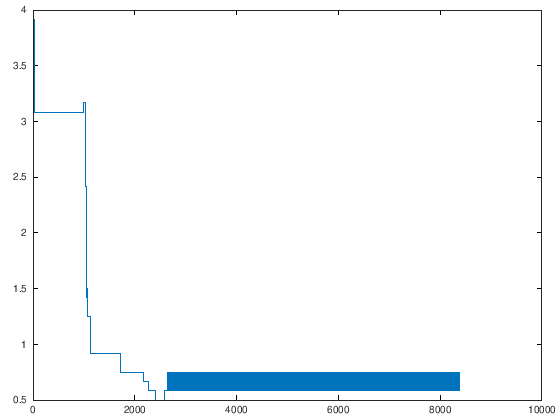

In [20]:
plot(mse_vec)

In [21]:
ans =  round(sum(X_train_bias'*W_bias', 2));

In [22]:
[ans, y_train, (y_train - ans)]

ans =

   8   5  -3
   7   5  -2
   7   5  -2
   7   6  -1
   8   5  -3
   7   5  -2
   7   5  -2
   8   7  -1
   8   7  -1
   5   5   0
   7   5  -2
   5   5   0
   7   5  -2
   8   5  -3
   4   5   1
   4   5   1
   6   7   1
   7   5  -2
   8   4  -4
   7   6  -1
   7   6  -1
   7   5  -2
   7   5  -2
   6   5  -1
   8   6  -2
   8   5  -3
   8   5  -3
   7   5  -2
   8   5  -3
   8   6  -2
   6   5  -1
   8   6  -2
   5   5   0
   7   6  -1
   7   5  -2
   8   6  -2
   8   6  -2
   8   7  -1
   8   4  -4
   6   5  -1
   6   5  -1
   7   4  -3
   8   6  -2
   8   5  -3
   8   5  -3
   6   4  -2
   5   5   0
   8   5  -3
   8   5  -3
   5   5   0
   8   5  -3
   8   6  -2
   8   6  -2
   5   5   0
   7   6  -1
   7   5  -2
   8   5  -3
   6   5  -1
   7   5  -2
   7   6  -1
   7   5  -2
   5   5   0
   8   7  -1
   7   5  -2
   8   5  -3
   8   5  -3
   7   5  -2
   8   5  -3
   7   5  -2
   8   6  -2
   8   6  -2
   6   5  -1
   6   5  -1
   7   4  -3
   6   5  -1
   7   5  -2
   7 

   8   6  -2
   8   5  -3
   7   6  -1
   6   4  -2
   6   5  -1
   8   5  -3
   4   5   1
   4   5   1
   8   7  -1
   7   6  -1
   8   5  -3
   7   5  -2
   8   5  -3
   7   5  -2
   8   5  -3
   8   7  -1
   8   5  -3
   8   4  -4
   8   7  -1
   4   6   2
   8   5  -3
   4   5   1
   7   5  -2
   8   6  -2
   8   5  -3
   7   5  -2
   8   5  -3
   8   7  -1
   8   6  -2
   8   4  -4
   8   6  -2
   7   5  -2
   8   6  -2
   8   6  -2
   7   5  -2
   7   5  -2
   8   6  -2
   8   6  -2
   8   5  -3
   8   6  -2
   7   5  -2
   8   5  -3
   4   5   1
   8   5  -3
   8   6  -2
   8   5  -3
   8   6  -2
   8   5  -3
   6   5  -1
   7   5  -2
   8   5  -3
   8   6  -2
   7   5  -2
   8   5  -3
   4   5   1
   8   5  -3
   7   5  -2
   8   5  -3
   8   5  -3
   8   5  -3
   8   3  -5
   6   5  -1
   7   5  -2
   5   5   0
   5   5   0
   7   6  -1
   8   6  -2
   8   6  -2
   6   5  -1
   8   6  -2
   6   6   0
   8   6  -2
   8   6  -2
   6   4  -2
   8   4  -4
   7   5  -2
   8   5  -3

In [23]:
y_test

y_test =

   5
   8
   6
   6
   6
   4
   7
   6
   6
   5
   6
   6
   5
   7
   7
   7
   6
   6
   6
   5
   6
   6
   6
   6
   6
   5
   6
   6
   7
   6
   6
   7
   6
   5
   6
   6
   5
   7
   7
   6
   5
   7
   6
   7
   5
   5
   5
   5
   7
   6
   6
   6
   6
   6
   6
   6
   6
   4
   7
   5
   6
   6
   5
   6
   5
   5
   6
   5
   6
   5
   4
   6
   5
   7
   5
   6
   6
   6
   6
   6
   6
   6
   7
   8
   5
   7
   7
   7
   5
   7
   7
   6
   5
   6
   6
   6
   6
   6
   6
   6
   6
   6
   6
   6
   6
   6
   5
   5
   5
   7
   5
   6
   5
   5
   4
   6
   4
   6
   6
   4
   4
   5
   5
   6
   5
   6
   5
   5
   5
   6
   6
   6
   5
   5
   5
   5
   5
   5
   6
   6
   6
   5
   4
   5
   4
   6
   6
   6
   6
   6
   8
   6
   6
   5
   5
   6
   6
   4
   6
   6
   7
   6
   6
   6
   6
   5
   5
   6
   5
   5
   5
   5
   6
   6
   4
   6
   5
   5
   6
   6
   3
   6
   6
   6
   5
   5
   5
   5
   4
   5
   5
   5
   6
   5
   6
   6
   6
   6
